In [1]:
import numpy as np
import networkx as nx
import json
from networkx.readwrite import json_graph
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
sns.set(color_codes=True)
import os
import sys
import pickle as pkl
import scipy.sparse as sp
from scipy.sparse.linalg.eigen.arpack import eigsh
from collections import Counter

In [2]:
graph_data = json.load(open("/home/gear/data/ppi/ppi-G.json"))
ppi = json_graph.node_link_graph(graph_data)

In [5]:
def gini(array):
    """Calculate the Gini coefficient of a numpy array."""
    # based on bottom eq:
    # http://www.statsdirect.com/help/generatedimages/equations/equation154.svg
    # from:
    # http://www.statsdirect.com/help/default.htm#nonparametric_methods/gini.htm
    # All values are treated equally, arrays must be 1d:
    array = array.flatten()
    if np.amin(array) < 0:
        # Values cannot be negative:
        array -= np.amin(array)
    # Values cannot be 0:
    array += 0.0000001
    # Values must be sorted:
    array = np.sort(array)
    # Index per array element:
    index = np.arange(1,array.shape[0]+1)
    # Number of array elements:
    n = array.shape[0]
    # Gini coefficient:
    return ((np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array)))

def graph_report(nx_graph, name=None):
    print("==== {} Report ====".format(name or "Untitled Graph"))
    print("Number of nodes: {:,} nodes".format(nx_graph.number_of_nodes()))
    print("Number of edges: {:,} edges".format(nx_graph.number_of_edges()))
    degs = nx_graph.degree().values()
    print("Average degree: {:.3f} edges / node".format(np.mean(degs)))
    print("Maximum degree: {:,} edges".format(np.max(degs)))
    print("Minimum degree: {:,} edges".format(np.min(degs)))
    print("Gini coefficient: {:.3f}".format(gini(np.array(degs, dtype=float))))
    print("Number of connected components: {} components".format(nx.number_connected_components(nx_graph)))
    print("Degree assortivity: {:.3f}".format(nx.assortativity.degree_assortativity_coefficient(nx_graph)))
    
def laplacian_spectrum(gnx, name=None):
    print("==== {} Report ====".format(name or "Untitled Graph"))
    lspec = nx.spectrum.laplacian_spectrum(gnx)
    print("Spectrum gap: {}".format(lspec[-1] - lspec[-2]))
    # Plot
    sns.set_style({'font.family':'sans-serif', 'font.sans-serif':'Computer Modern'})
    sns.set(font_scale=1.2) 
    fig, ax = plt.subplots(figsize=(6,5))
    ax.set_title("Laplacian Eigenvalues of {}".format(name), fontsize=15)
    ax.set_xlabel("Index", fontsize=15)
    ax.set_ylabel("Real", fontsize=15)
    ax.set_xscale("linear")
    sns.lineplot(x=range(gnx.number_of_nodes()), y=lspec)
    plt.savefig("lapspec_{}.pdf".format(name))
    
def plot_degree_dist(nxg, name=None):
    print("==== {} Report ====".format(name or "Untitled Graph"))
    degs = nxg.degree().values()
    degs = Counter(degs)
    xdata = sorted(degs.keys())
    ydata = [degs[i] for i in xdata]
    # Plot
    sns.set_style({'font.family':'sans-serif', 'font.sans-serif':'Computer Modern'})
    sns.set(font_scale=1.2) 
    fig, ax = plt.subplots(figsize=(6,5))
    ax.set_title("Degree Distribution of {}".format(name), fontsize=15)
    ax.set_xlabel("Log-Degree", fontsize=15)
    ax.set_ylabel("Log-Count", fontsize=15)
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax = sns.scatterplot(x=xdata, y=ydata)
    plt.savefig("degree_{}.pdf".format(name))

In [4]:
graph_report(ppi, "PPI")

==== PPI Report ====
Number of nodes: 56,944 nodes
Number of edges: 818,716 edges
Average degree: 28.755 edges / node
Maximum degree: 722 edges
Minimum degree: 1 edges
Gini coefficient: 0.570
Number of connected components: 295 components
Degree assortivity: -0.038


==== PPI Report ====


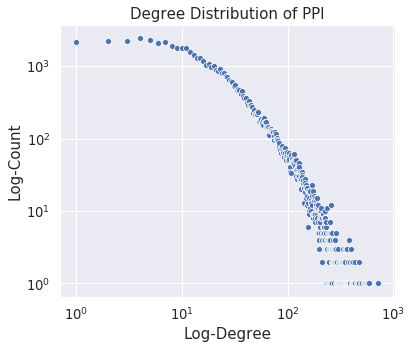

In [6]:
plot_degree_dist(ppi, "PPI")

In [12]:
train = []
val = []
test = []
for i in nx.connected_component_subgraphs(ppi):
    if i.size() > 3:
        if i.node[i.nodes()[0]]['test']:
            test.append(i)
        elif i.node[i.nodes()[0]]['val']:
            val.append(i)
        else:
            train.append(i)

==== PPI_train_0 Report ====
Spectrum gap: 28.9389440176
==== PPI_train_1 Report ====
Spectrum gap: 36.9778352797
==== PPI_train_2 Report ====
Spectrum gap: 16.9758674562
==== PPI_train_3 Report ====
Spectrum gap: 19.9689560058
==== PPI_train_4 Report ====
Spectrum gap: 27.9528069344
==== PPI_train_5 Report ====
Spectrum gap: 3.0436654433
==== PPI_train_6 Report ====
Spectrum gap: 22.9632269023
==== PPI_train_7 Report ====
Spectrum gap: 41.9510381101
==== PPI_train_8 Report ====
Spectrum gap: 14.5132523702
==== PPI_train_9 Report ====
Spectrum gap: 170.966707698
==== PPI_train_10 Report ====
Spectrum gap: 24.9673990031
==== PPI_train_11 Report ====
Spectrum gap: 5.02657660292
==== PPI_train_12 Report ====
Spectrum gap: 26.0005289331
==== PPI_train_13 Report ====
Spectrum gap: 16.9887987988
==== PPI_train_14 Report ====
Spectrum gap: 37.951670468
==== PPI_train_15 Report ====
Spectrum gap: 32.9607290841
==== PPI_train_16 Report ====
Spectrum gap: 39.9935864796
==== PPI_train_17 Report =

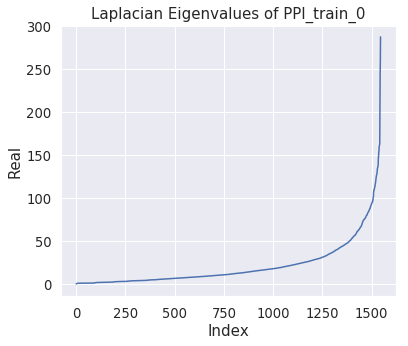

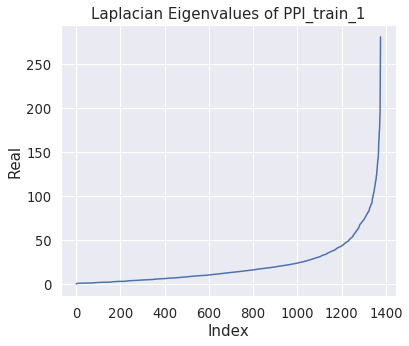

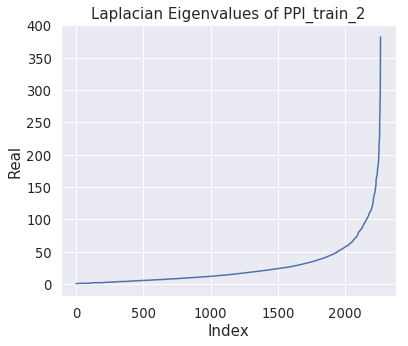

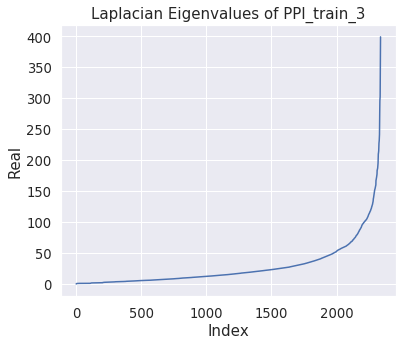

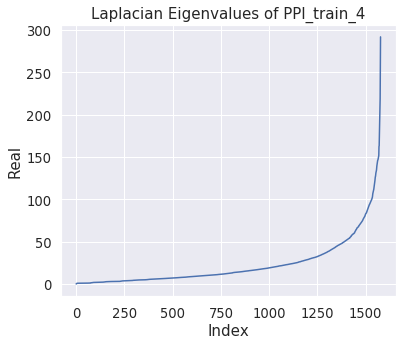

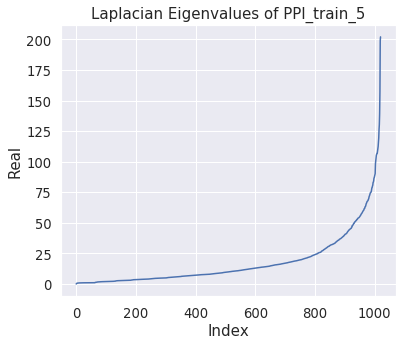

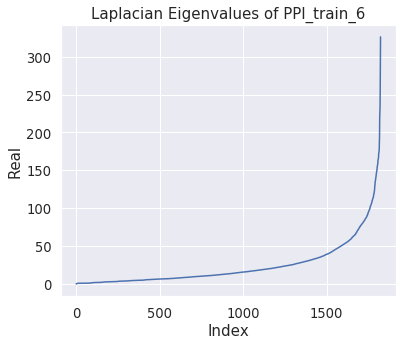

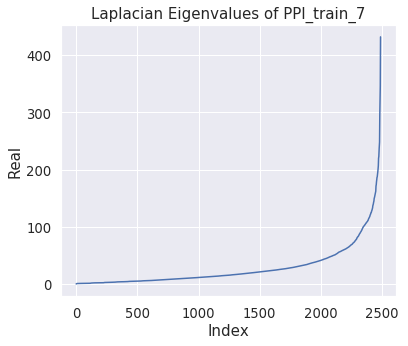

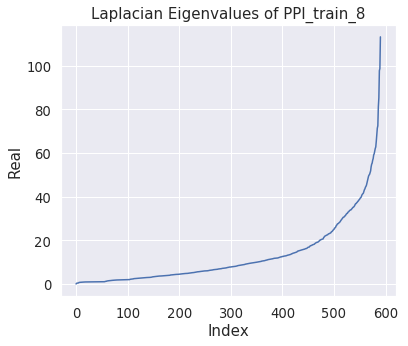

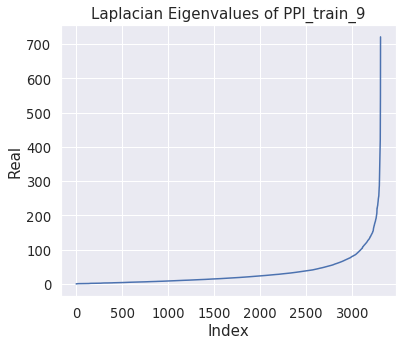

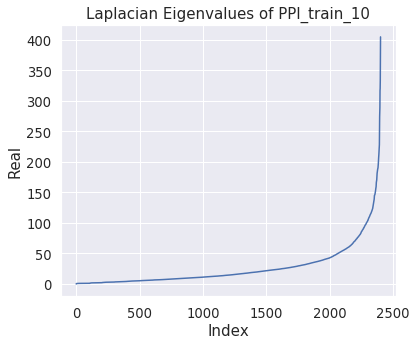

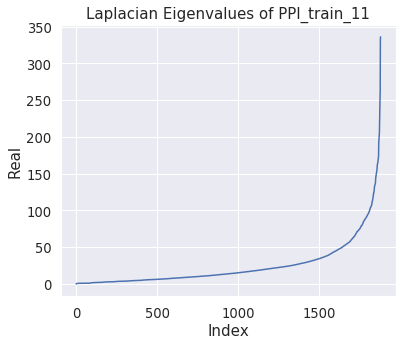

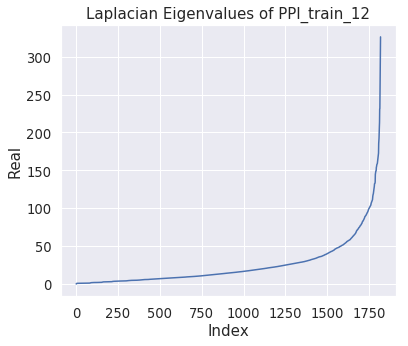

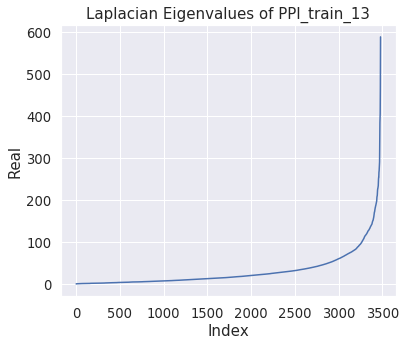

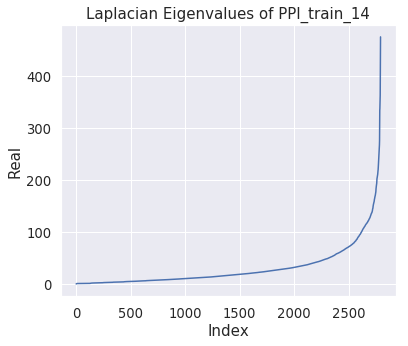

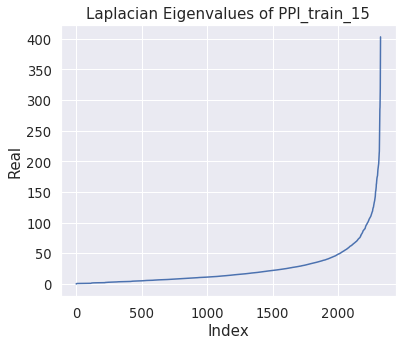

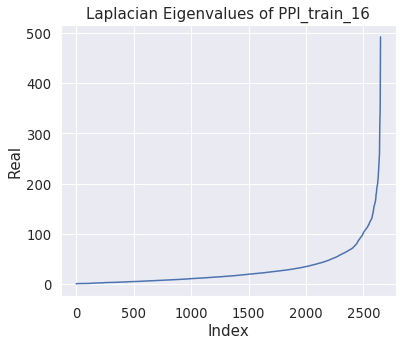

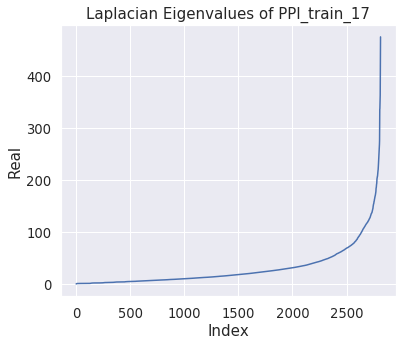

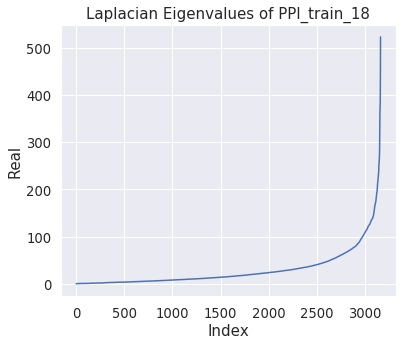

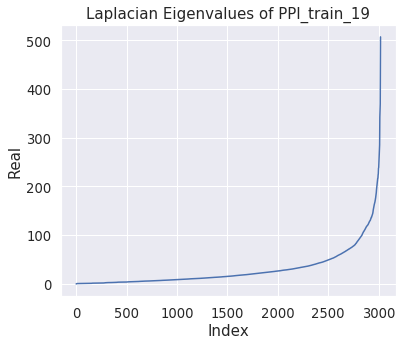

In [16]:
for i, g in enumerate(train):
    laplacian_spectrum(g, "PPI_train_{}".format(i))

==== PPI_test_0 Report ====
Spectrum gap: 35.9993848512
==== PPI_test_1 Report ====
Spectrum gap: 20.9648132495


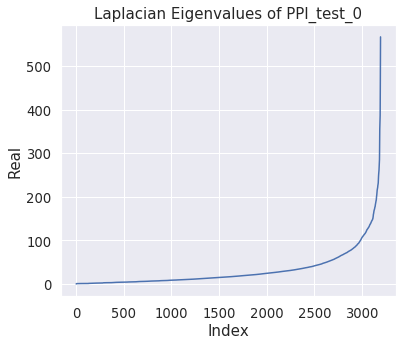

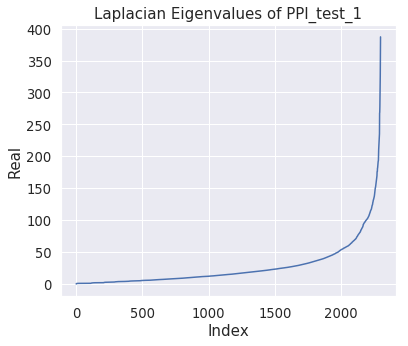

In [17]:
for i, g in enumerate(test):
    laplacian_spectrum(g, "PPI_test_{}".format(i))

==== PPI_val_0 Report ====
Spectrum gap: 82.933054888
==== PPI_val_1 Report ====
Spectrum gap: 23.0050289044


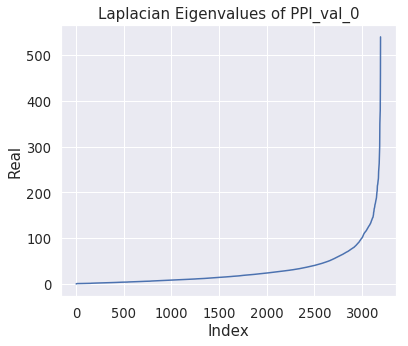

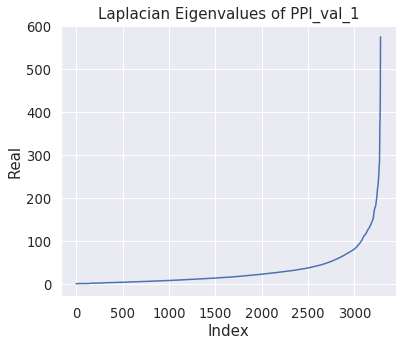

In [18]:
for i, g in enumerate(val):
    laplacian_spectrum(g, "PPI_val_{}".format(i))

In [20]:
import sys
sys.path.append("../graph_sage")

In [22]:
from utils import load_data

ImportError: No module named utils